In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("nhanes32006data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18414 entries, 0 to 18413
Data columns (total 33 columns):
Unnamed: 0    18414 non-null int64
age           18396 non-null float64
agestrat      18386 non-null object
sex           18414 non-null object
race          18414 non-null object
ses           18414 non-null float64
smokehx       18411 non-null object
bmi           16599 non-null float64
obese         16203 non-null object
htnhx         18252 non-null object
sbp           16168 non-null float64
dbp           16166 non-null float64
hdl           15605 non-null float64
ldl           6641 non-null float64
chol          15716 non-null float64
hldhx         17771 non-null float64
lowhdl        16636 non-null object
ldlstrata     6688 non-null object
cholstrata    16636 non-null object
trig          15681 non-null float64
hitrig        16636 non-null object
uralb         16203 non-null float64
ualbquart     16203 non-null object
higlu         15887 non-null object
hba1c         15887

In [4]:
df.head()

,Unnamed: 0,age,agestrat,sex,race,ses,smokehx,bmi,obese,htnhx,...,higlu,hba1c,dm,hf,stroke,mi,fasttime,fast,mortstat,PERMTH_INT
0,1,21.750000,21-35,male,non hispanic black,0.641,yes,25.5,no,hypertensive,...,no,5.3,no,no,no,no,6.52,no,alive,203.0
1,2,32.000000,21-35,female,non hispanic black,4.803,yes,23.4,yes,no,...,no,4.6,no,no,no,no,6.12,no,alive,201.0
2,3,48.583333,35-50,female,hispanic,3.747,no,27.6,yes,no,...,no,5.3,no,no,no,no,13.73,no,alive,201.0
3,4,35.666667,35-50,male,hispanic,5.406,yes,29.4,yes,hypertensive,...,no,4.6,no,no,no,no,15.45,no,alive,196.0
4,5,48.500000,35-50,male,non hispanic black,1.676,no,25.0,no,no,...,yes,9.1,diabetes,no,no,no,1.85,yes,alive,190.0


In [5]:
df.columns

Index(['Unnamed: 0', 'age', 'agestrat', 'sex', 'race', 'ses', 'smokehx', 'bmi',
       'obese', 'htnhx', 'sbp', 'dbp', 'hdl', 'ldl', 'chol', 'hldhx', 'lowhdl',
       'ldlstrata', 'cholstrata', 'trig', 'hitrig', 'uralb', 'ualbquart',
       'higlu', 'hba1c', 'dm', 'hf', 'stroke', 'mi', 'fasttime', 'fast',
       'mortstat', 'PERMTH_INT'],
      dtype='object')

In [6]:
df = df[['agestrat','race','sex','ses','hf','stroke','mi','fast','hba1c','obese','hdl','trig','htnhx','sbp','dbp','mortstat']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18414 entries, 0 to 18413
Data columns (total 16 columns):
agestrat    18386 non-null object
race        18414 non-null object
sex         18414 non-null object
ses         18414 non-null float64
hf          18383 non-null object
stroke      18403 non-null object
mi          18168 non-null object
fast        16636 non-null object
hba1c       15887 non-null float64
obese       16203 non-null object
hdl         15605 non-null float64
trig        15681 non-null float64
htnhx       18252 non-null object
sbp         16168 non-null float64
dbp         16166 non-null float64
mortstat    18387 non-null object
dtypes: float64(6), object(10)
memory usage: 2.2+ MB


In [8]:
df.shape

(18414, 16)

In [9]:
df.head()

,agestrat,race,sex,ses,hf,stroke,mi,fast,hba1c,obese,hdl,trig,htnhx,sbp,dbp,mortstat
0,21-35,non hispanic black,male,0.641,no,no,no,no,5.3,no,38.0,174.0,hypertensive,120.0,67.0,alive
1,21-35,non hispanic black,female,4.803,no,no,no,no,4.6,yes,55.0,84.0,no,126.0,86.0,alive
2,35-50,hispanic,female,3.747,no,no,no,no,5.3,yes,66.0,98.0,no,131.0,73.0,alive
3,35-50,hispanic,male,5.406,no,no,no,no,4.6,yes,43.0,109.0,hypertensive,130.0,82.0,alive
4,35-50,non hispanic black,male,1.676,no,no,no,yes,9.1,no,51.0,94.0,no,120.0,70.0,alive


In [10]:
num_columns = ['ses','hba1c','hdl','trig','sbp','dbp']

In [11]:
for var in num_columns:
    print(f'| {var:10} | Mean: {df[var].mean():7.2f} | Median: {df[var].median():.2f} | Max: {df[var].max():.2f} | Min: {df[var].min():.2f} |')

| ses        | Mean: 92830.01 | Median: 2.24 | Max: 888888.00 | Min: 0.00 |
| hba1c      | Mean:    5.58 | Median: 5.40 | Max: 16.20 | Min: 2.80 |
| hdl        | Mean:   51.18 | Median: 49.00 | Max: 196.00 | Min: 8.00 |
| trig       | Mean:  146.44 | Median: 116.00 | Max: 3616.00 | Min: 22.00 |
| sbp        | Mean:  126.31 | Median: 123.00 | Max: 244.00 | Min: 69.00 |
| dbp        | Mean:   74.54 | Median: 74.00 | Max: 142.00 | Min: 20.00 |


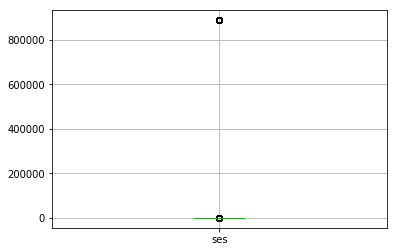

In [12]:
df[['ses']].boxplot()

In [13]:
df['ses'][df["ses"] == 888888.000] = np.nan

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18414 entries, 0 to 18413
Data columns (total 16 columns):
agestrat    18386 non-null object
race        18414 non-null object
sex         18414 non-null object
ses         16491 non-null float64
hf          18383 non-null object
stroke      18403 non-null object
mi          18168 non-null object
fast        16636 non-null object
hba1c       15887 non-null float64
obese       16203 non-null object
hdl         15605 non-null float64
trig        15681 non-null float64
htnhx       18252 non-null object
sbp         16168 non-null float64
dbp         16166 non-null float64
mortstat    18387 non-null object
dtypes: float64(6), object(10)
memory usage: 2.2+ MB


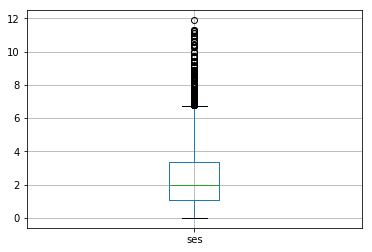

In [15]:
df[['ses']].boxplot()

In [16]:
for var in num_columns:
    print(f'| {var:15s} | Mean: {df[var].mean():7.2f} | Median: {df[var].median():7.2f} | Max: {df[var].max():7.2f} | Min: {df[var].min():7.2f} |')

| ses             | Mean:    2.44 | Median:    1.96 | Max:   11.89 | Min:    0.00 |
| hba1c           | Mean:    5.58 | Median:    5.40 | Max:   16.20 | Min:    2.80 |
| hdl             | Mean:   51.18 | Median:   49.00 | Max:  196.00 | Min:    8.00 |
| trig            | Mean:  146.44 | Median:  116.00 | Max: 3616.00 | Min:   22.00 |
| sbp             | Mean:  126.31 | Median:  123.00 | Max:  244.00 | Min:   69.00 |
| dbp             | Mean:   74.54 | Median:   74.00 | Max:  142.00 | Min:   20.00 |


In [17]:
df['htnhx'].value_counts()

no              12916
hypertensive     5336
Name: htnhx, dtype: int64

In [18]:
for var in df.columns:
    print(f'| {var :15s} | Missing: {df[var].isna().sum() : 15} |')

| agestrat        | Missing:              28 |
| race            | Missing:               0 |
| sex             | Missing:               0 |
| ses             | Missing:            1923 |
| hf              | Missing:              31 |
| stroke          | Missing:              11 |
| mi              | Missing:             246 |
| fast            | Missing:            1778 |
| hba1c           | Missing:            2527 |
| obese           | Missing:            2211 |
| hdl             | Missing:            2809 |
| trig            | Missing:            2733 |
| htnhx           | Missing:             162 |
| sbp             | Missing:            2246 |
| dbp             | Missing:            2248 |
| mortstat        | Missing:              27 |


In [19]:
df.dropna().shape

(13434, 16)

In [20]:
df.shape

(18414, 16)

In [21]:
df = df.dropna()

In [22]:
df['htn'] = (df['sbp']>130) & (df['dbp']>85) & (df['htnhx']=='hypertensive')

In [23]:
df.head()

,agestrat,race,sex,ses,hf,stroke,mi,fast,hba1c,obese,hdl,trig,htnhx,sbp,dbp,mortstat,htn
0,21-35,non hispanic black,male,0.641,no,no,no,no,5.3,no,38.0,174.0,hypertensive,120.0,67.0,alive,False
1,21-35,non hispanic black,female,4.803,no,no,no,no,4.6,yes,55.0,84.0,no,126.0,86.0,alive,False
2,35-50,hispanic,female,3.747,no,no,no,no,5.3,yes,66.0,98.0,no,131.0,73.0,alive,False
3,35-50,hispanic,male,5.406,no,no,no,no,4.6,yes,43.0,109.0,hypertensive,130.0,82.0,alive,False
4,35-50,non hispanic black,male,1.676,no,no,no,yes,9.1,no,51.0,94.0,no,120.0,70.0,alive,False


In [24]:
df['hba1c'] = df['hba1c']>5.7

In [25]:
df.head()

,agestrat,race,sex,ses,hf,stroke,mi,fast,hba1c,obese,hdl,trig,htnhx,sbp,dbp,mortstat,htn
0,21-35,non hispanic black,male,0.641,no,no,no,no,False,no,38.0,174.0,hypertensive,120.0,67.0,alive,False
1,21-35,non hispanic black,female,4.803,no,no,no,no,False,yes,55.0,84.0,no,126.0,86.0,alive,False
2,35-50,hispanic,female,3.747,no,no,no,no,False,yes,66.0,98.0,no,131.0,73.0,alive,False
3,35-50,hispanic,male,5.406,no,no,no,no,False,yes,43.0,109.0,hypertensive,130.0,82.0,alive,False
4,35-50,non hispanic black,male,1.676,no,no,no,yes,True,no,51.0,94.0,no,120.0,70.0,alive,False


In [26]:
df['trig'] = df['trig']>150

In [27]:
df.head()

,agestrat,race,sex,ses,hf,stroke,mi,fast,hba1c,obese,hdl,trig,htnhx,sbp,dbp,mortstat,htn
0,21-35,non hispanic black,male,0.641,no,no,no,no,False,no,38.0,True,hypertensive,120.0,67.0,alive,False
1,21-35,non hispanic black,female,4.803,no,no,no,no,False,yes,55.0,False,no,126.0,86.0,alive,False
2,35-50,hispanic,female,3.747,no,no,no,no,False,yes,66.0,False,no,131.0,73.0,alive,False
3,35-50,hispanic,male,5.406,no,no,no,no,False,yes,43.0,False,hypertensive,130.0,82.0,alive,False
4,35-50,non hispanic black,male,1.676,no,no,no,yes,True,no,51.0,False,no,120.0,70.0,alive,False


In [28]:
df['hdl'] = ((df['sex'] == 'male') & (df['hdl'] < 40)) | ((df['sex'] == 'female') & (df['hdl'] < 50))

In [29]:
df.head()

,agestrat,race,sex,ses,hf,stroke,mi,fast,hba1c,obese,hdl,trig,htnhx,sbp,dbp,mortstat,htn
0,21-35,non hispanic black,male,0.641,no,no,no,no,False,no,True,True,hypertensive,120.0,67.0,alive,False
1,21-35,non hispanic black,female,4.803,no,no,no,no,False,yes,False,False,no,126.0,86.0,alive,False
2,35-50,hispanic,female,3.747,no,no,no,no,False,yes,False,False,no,131.0,73.0,alive,False
3,35-50,hispanic,male,5.406,no,no,no,no,False,yes,False,False,hypertensive,130.0,82.0,alive,False
4,35-50,non hispanic black,male,1.676,no,no,no,yes,True,no,False,False,no,120.0,70.0,alive,False


In [30]:
df['obese'] = (df['obese'] == 'yes')

In [31]:
df.head()

,agestrat,race,sex,ses,hf,stroke,mi,fast,hba1c,obese,hdl,trig,htnhx,sbp,dbp,mortstat,htn
0,21-35,non hispanic black,male,0.641,no,no,no,no,False,False,True,True,hypertensive,120.0,67.0,alive,False
1,21-35,non hispanic black,female,4.803,no,no,no,no,False,True,False,False,no,126.0,86.0,alive,False
2,35-50,hispanic,female,3.747,no,no,no,no,False,True,False,False,no,131.0,73.0,alive,False
3,35-50,hispanic,male,5.406,no,no,no,no,False,True,False,False,hypertensive,130.0,82.0,alive,False
4,35-50,non hispanic black,male,1.676,no,no,no,yes,True,False,False,False,no,120.0,70.0,alive,False


In [32]:
meta_column = ['obese','hdl','trig','htn','hba1c']
for var in meta_column:
    print(f'| {var :15s} | Positive: {df[var].sum() : 15} |')

| obese           | Positive:            6148 |
| hdl             | Positive:            4916 |
| trig            | Positive:            4296 |
| htn             | Positive:             854 |
| hba1c           | Positive:            3268 |


In [33]:
df[meta_column].head()

,obese,hdl,trig,htn,hba1c
0,False,True,True,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,False,False,False,False,True


In [34]:
df['metabolic'] = df[meta_column].sum(axis=1)>=3

In [35]:
df.head()

,agestrat,race,sex,ses,hf,stroke,mi,fast,hba1c,obese,hdl,trig,htnhx,sbp,dbp,mortstat,htn,metabolic
0,21-35,non hispanic black,male,0.641,no,no,no,no,False,False,True,True,hypertensive,120.0,67.0,alive,False,False
1,21-35,non hispanic black,female,4.803,no,no,no,no,False,True,False,False,no,126.0,86.0,alive,False,False
2,35-50,hispanic,female,3.747,no,no,no,no,False,True,False,False,no,131.0,73.0,alive,False,False
3,35-50,hispanic,male,5.406,no,no,no,no,False,True,False,False,hypertensive,130.0,82.0,alive,False,False
4,35-50,non hispanic black,male,1.676,no,no,no,yes,True,False,False,False,no,120.0,70.0,alive,False,False


In [36]:
df['metabolic'].sum()

2870

In [37]:
df = df[['agestrat','race','sex','ses','hf','stroke','mi','fast','metabolic','mortstat']]

In [38]:
df.head()

,agestrat,race,sex,ses,hf,stroke,mi,fast,metabolic,mortstat
0,21-35,non hispanic black,male,0.641,no,no,no,no,False,alive
1,21-35,non hispanic black,female,4.803,no,no,no,no,False,alive
2,35-50,hispanic,female,3.747,no,no,no,no,False,alive
3,35-50,hispanic,male,5.406,no,no,no,no,False,alive
4,35-50,non hispanic black,male,1.676,no,no,no,yes,False,alive


In [39]:
df.shape

(13434, 10)

In [40]:
df['agestrat'].value_counts()

21-35    4089
35-50    3507
65+      3264
50-65    2574
Name: agestrat, dtype: int64

In [41]:
df['ses'].quantile([0,0.25,0.5,0.75,1])

0.00     0.000
0.25     1.070
0.50     1.979
0.75     3.341
1.00    11.889
Name: ses, dtype: float64

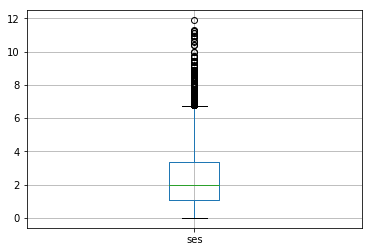

In [42]:
df[['ses']].boxplot()

In [43]:
sum(df['ses']>6.5)

458

In [44]:
df['ses'] = df['ses']<1

In [45]:
df.head(10)

,agestrat,race,sex,ses,hf,stroke,mi,fast,metabolic,mortstat
0,21-35,non hispanic black,male,True,no,no,no,no,False,alive
1,21-35,non hispanic black,female,False,no,no,no,no,False,alive
2,35-50,hispanic,female,False,no,no,no,no,False,alive
3,35-50,hispanic,male,False,no,no,no,no,False,alive
4,35-50,non hispanic black,male,False,no,no,no,yes,False,alive
5,35-50,non hispanic white,male,True,no,no,no,no,False,dead
6,35-50,non hispanic white,female,False,no,no,no,no,False,alive
9,50-65,hispanic,female,False,no,no,no,no,True,alive
10,65+,hispanic,female,True,no,no,no,no,False,dead
11,35-50,non hispanic black,male,False,no,no,no,no,False,alive


In [46]:
df['agestrat'].unique()

array(['21-35', '35-50', '50-65', '65+'], dtype=object)

In [47]:
age_map = {
    '21-35' : 0,
    '35-50' : 1,
    '50-65' : 2,
    '65+'   : 3,
}
df.replace(age_map,inplace=True)

In [48]:
df.head()

,agestrat,race,sex,ses,hf,stroke,mi,fast,metabolic,mortstat
0,0,non hispanic black,male,True,no,no,no,no,False,alive
1,0,non hispanic black,female,False,no,no,no,no,False,alive
2,1,hispanic,female,False,no,no,no,no,False,alive
3,1,hispanic,male,False,no,no,no,no,False,alive
4,1,non hispanic black,male,False,no,no,no,yes,False,alive


In [49]:
df["sex"] = df["sex"].apply(lambda x: 1 if x == 'male' else 0)
for var in ["ses","metabolic"]:
    df[var] = df[var].apply(lambda x: 1 if x else 0)
for var in ["hf","stroke","mi","fast"]:
    df[var] = df[var].apply(lambda x: 1 if x == "yes" else 0)

In [50]:
df.head()

,agestrat,race,sex,ses,hf,stroke,mi,fast,metabolic,mortstat
0,0,non hispanic black,1,1,0,0,0,0,0,alive
1,0,non hispanic black,0,0,0,0,0,0,0,alive
2,1,hispanic,0,0,0,0,0,0,0,alive
3,1,hispanic,1,0,0,0,0,0,0,alive
4,1,non hispanic black,1,0,0,0,0,1,0,alive


In [51]:
df.shape

(13434, 10)

In [52]:
df = pd.get_dummies(df, columns=['race'])

In [53]:
df.head()

,agestrat,sex,ses,hf,stroke,mi,fast,metabolic,mortstat,race_hispanic,race_multiracial,race_non hispanic black,race_non hispanic white
0,0,1,1,0,0,0,0,0,alive,0,0,1,0
1,0,0,0,0,0,0,0,0,alive,0,0,1,0
2,1,0,0,0,0,0,0,0,alive,1,0,0,0
3,1,1,0,0,0,0,0,0,alive,1,0,0,0
4,1,1,0,0,0,0,1,0,alive,0,0,1,0


In [54]:
df.to_csv("Processed-nhanes3.csv",index=None)

In [55]:
df.shape

(13434, 13)